In [351]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
data = pd.read_csv("income.csv")
data.head()


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [352]:
data.shape

(22, 3)

In [353]:
data.drop('Name', axis = 'columns', inplace = True)

In [354]:
data.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


Text(0, 0.5, 'Income($)')

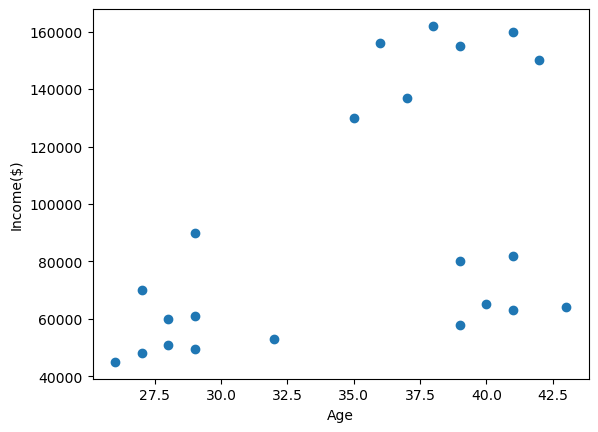

In [355]:
plt.scatter(data.Age, data['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [356]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [357]:
data['cluster'] = y_predicted
data.head()

,Age,Income($),cluster
0,27,70000,0
1,29,90000,0
2,29,61000,2
3,28,60000,2
4,42,150000,1


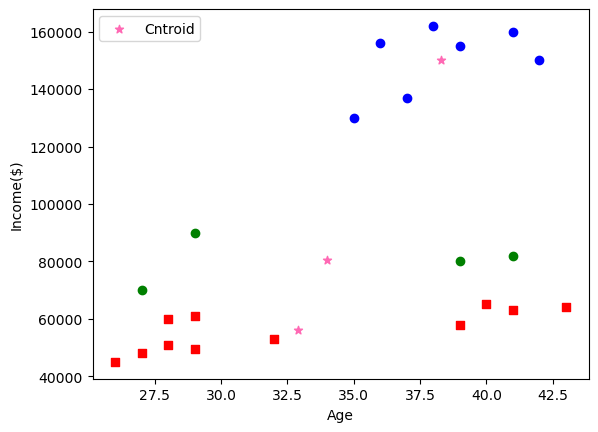

In [358]:
%matplotlib inline
data0 = data[data.cluster == 0]
data1 = data[data.cluster == 1]
data2 = data[data.cluster == 2]
plt.xlabel('Age')
plt.ylabel('Income($)')

plt.scatter(data0.Age, data0['Income($)'], color = 'green', )
plt.scatter(data1.Age, data1['Income($)'], color = 'blue', marker = 'o')
plt.scatter(data2.Age, data2['Income($)'], color = 'red', marker = 's')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'hotpink', marker = '*', label = 'Cntroid')
plt.legend()

# These data are not exactly clustered due to improper scalling 
### Let's scale by using MinMaxScaling

In [359]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(data[['Income($)']])
data['Income($)'] = scaler.transform(data[['Income($)']])

scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])
data.head()

,Age,Income($),cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,2
3,0.117647,0.128205,2
4,0.941176,0.897436,1


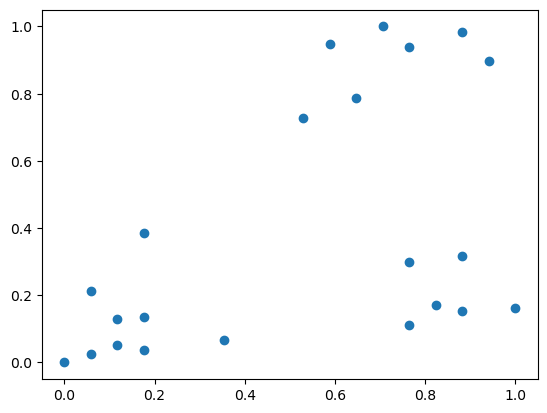

In [360]:
plt.scatter(data.Age,data['Income($)'])

# Let's drop cluster column before using KMeans algo

In [361]:
data.drop('cluster', axis = 'columns', inplace = True)
data.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [362]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(data)
# you can apply KMeans without dropping cluter column by using data this way too 
#y_predicted = km.fit_predict(data[['Age', 'Income($)']])

In [363]:
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [364]:
data['cluster'] = y_predicted
data.head()

,Age,Income($),cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0


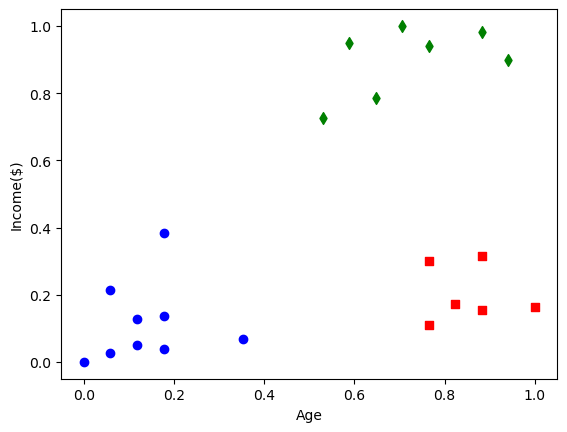

In [365]:
data0 = data[data.cluster == 0]
data1 = data[data.cluster == 1]
data2 = data[data.cluster == 2]
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(data0.Age, data0['Income($)'], color = 'green', marker = 'd')
plt.scatter(data1.Age, data1['Income($)'], color = 'blue', marker = 'o')
plt.scatter(data2.Age, data2['Income($)'], color = 'red', marker = 's')

# Now let's draw Elbo PLot

In [370]:
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters = k)
    km.fit(data)
    sse.append(km.inertia_)

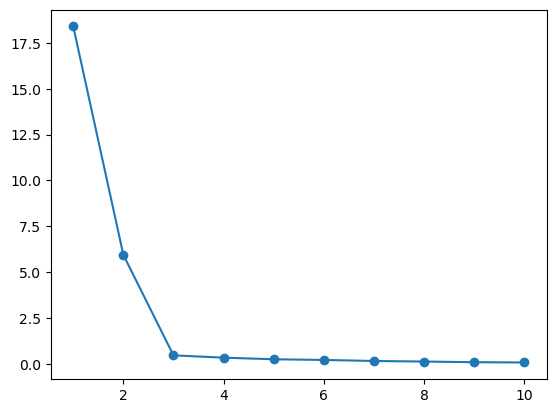

In [371]:
plt.scatter(k_rang, sse)
plt.plot(k_rang, sse)